In [1]:
import sys

sys.path.append("..")

# Make data *.joblib

In [2]:
import json
import os

from src.data.msp import prepare_joblib

RUN_DIR = "target_result/renewed"
with open(os.path.join(RUN_DIR, "mixture_metadata.json")) as f:
    meta = json.load(f)

prepare_joblib(meta, RUN_DIR)

/workspace-SR008.nfs2/nachevsky/simplex/epsilon-transformers/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import joblib

from src.data.build_gt import build_joint_gt_cartesian


out = build_joint_gt_cartesian(
  f"{RUN_DIR}/mess3_ground_truth_data.joblib",
  f"{RUN_DIR}/tom_quantum_ground_truth_data.joblib",
  mode='concat'
)

gt_path = f"{RUN_DIR}/mixture_ground_truth_data.joblib"
joblib.dump(out, gt_path)

  0%|                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


['target_result/renewed/mixture_ground_truth_data.joblib']

# Model activation analysis

In [6]:

from src.analysis.model_lens import load_model
from src.data.msp import gt_to_msp_fixed_ctx


X_tokens, Y_beliefs, W_probs, _ = gt_to_msp_fixed_ctx(gt_path, 6, max_len=100_000)  # X:[N,L], Y:[N,S] или [N,L,S], W:[N]
run_dir = "target_result/renewed"
models, ckpt_paths = load_model(run_dir, ckpt='first and last')


Moving model to device:  cpu
target_result/renewed/0.pt
Moving model to device:  cpu
target_result/renewed/14794752000.pt
Moving model to device:  cpu
target_result/renewed/9879552000.pt


In [7]:
from src.analysis.regression import run_full_regression_last_token


results = []
for model in models:
    results.append(
        run_full_regression_last_token(model, X_tokens, Y_beliefs, W_probs, pos=-1)
        )

  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:00<00:00,  7.37it/s]

RMSE: 0.25494545698165894
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:00<00:00,  6.03it/s]

RMSE: 0.28124603629112244
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:00<00:00,  5.49it/s]

RMSE: 0.28533443808555603
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:00<00:00,  5.22it/s]

RMSE: 0.28924041986465454
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

RMSE: 0.2011774182319641



  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:00<00:00,  8.72it/s]

RMSE: 0.14438191056251526
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:00<00:00,  5.92it/s]

RMSE: 0.10047024488449097
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:00<00:00,  5.29it/s]

RMSE: 0.05240098759531975
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:00<00:00,  4.97it/s]

RMSE: 0.0268331877887249
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

RMSE: 0.018539777025580406



  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:00<00:00,  6.20it/s]

RMSE: 0.14780758321285248
blocks.1.hook_resid_post
RMSE: 0.10080601274967194
blocks.2.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:00<00:00,  5.48it/s]

RMSE: 0.05470697954297066
blocks.3.hook_resid_post
RMSE: 0.030525287613272667
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

RMSE: 0.021713905036449432


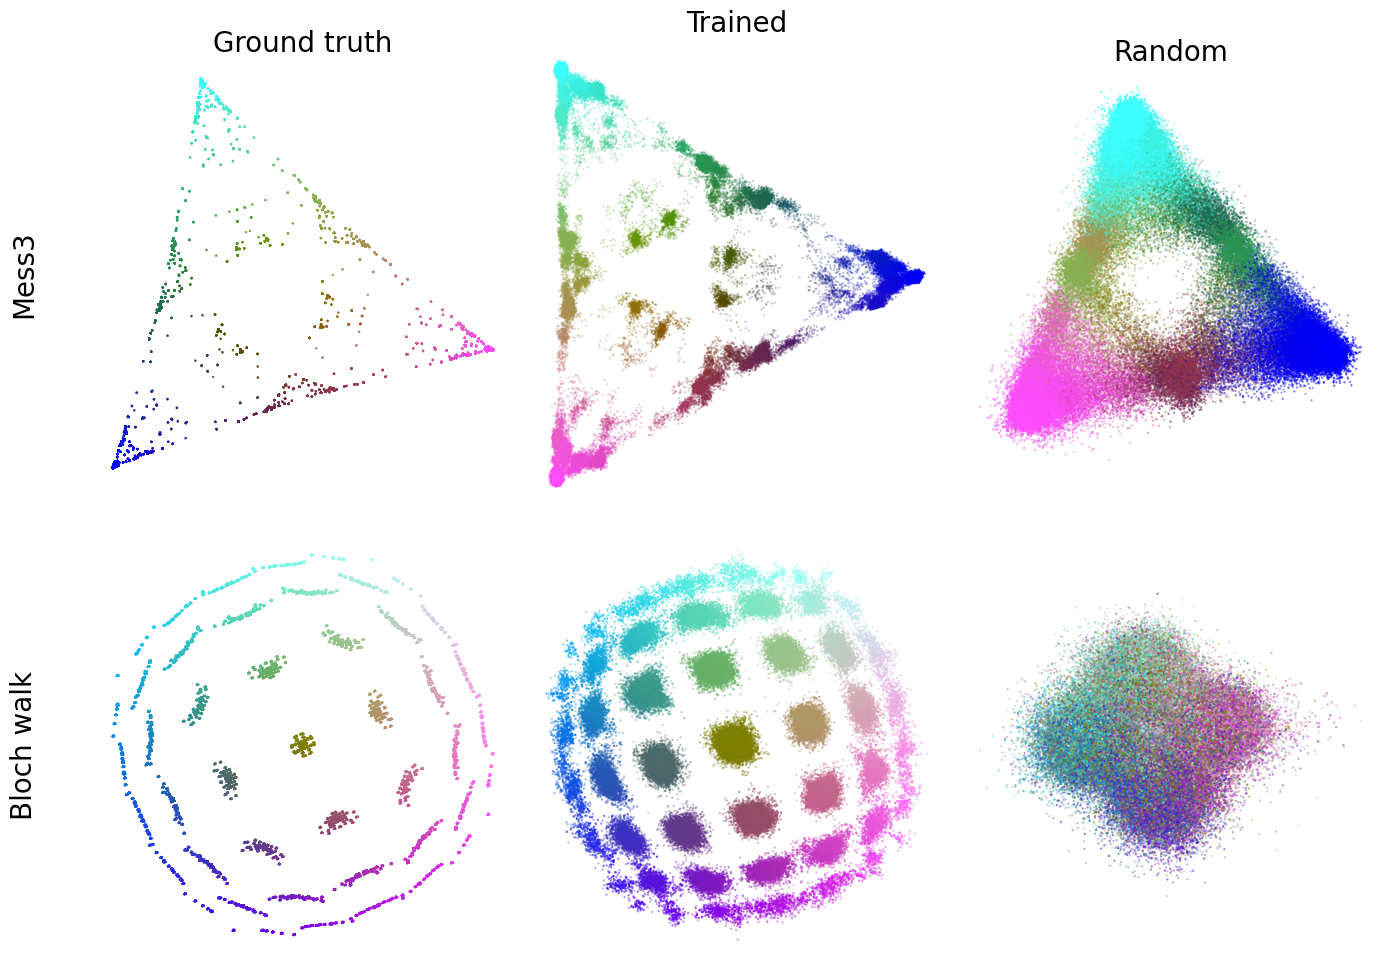

In [8]:
from src.drawing import plot_triangle_and_sphere

plot_triangle_and_sphere(results[1], results[0], Y_beliefs, W_probs)

/workspace-SR008.nfs2/nachevsky/simplex/epsilon-transformers/src/drawing.py:94: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


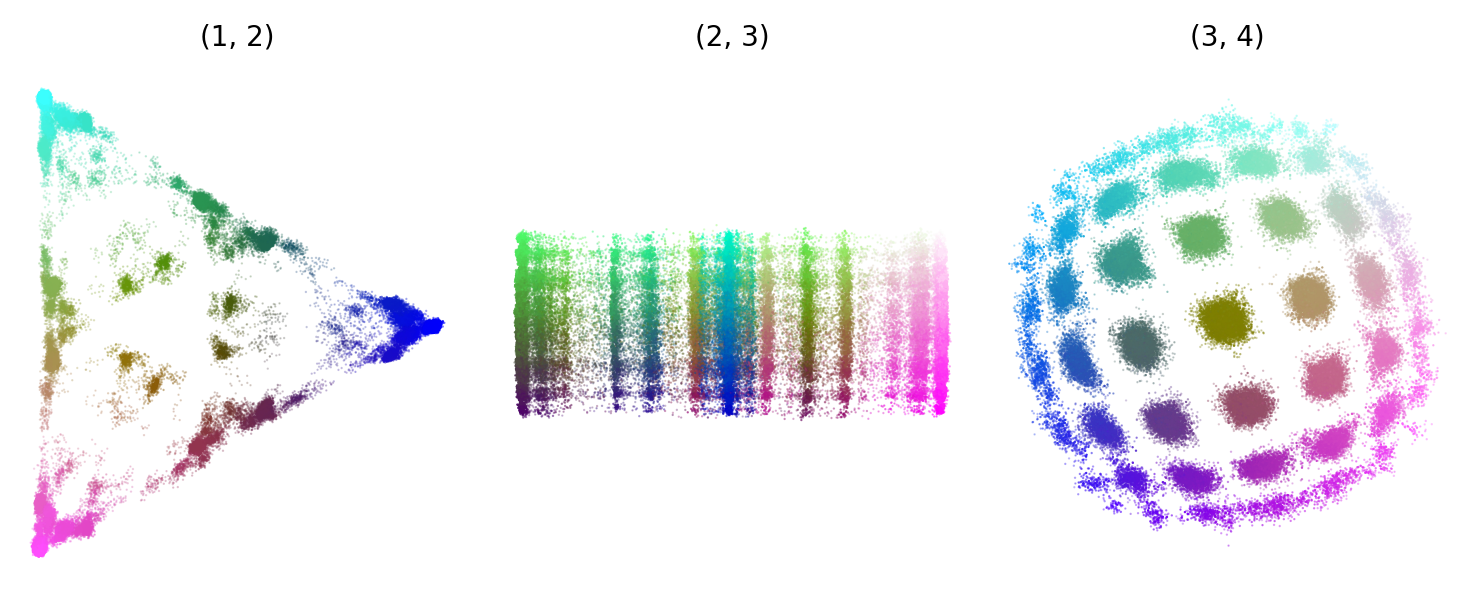

In [11]:
from src.drawing import plot_projections

plot_projections(results[1], Y_beliefs, W_probs)

/workspace-SR008.nfs2/nachevsky/simplex/epsilon-transformers/src/drawing.py:94: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


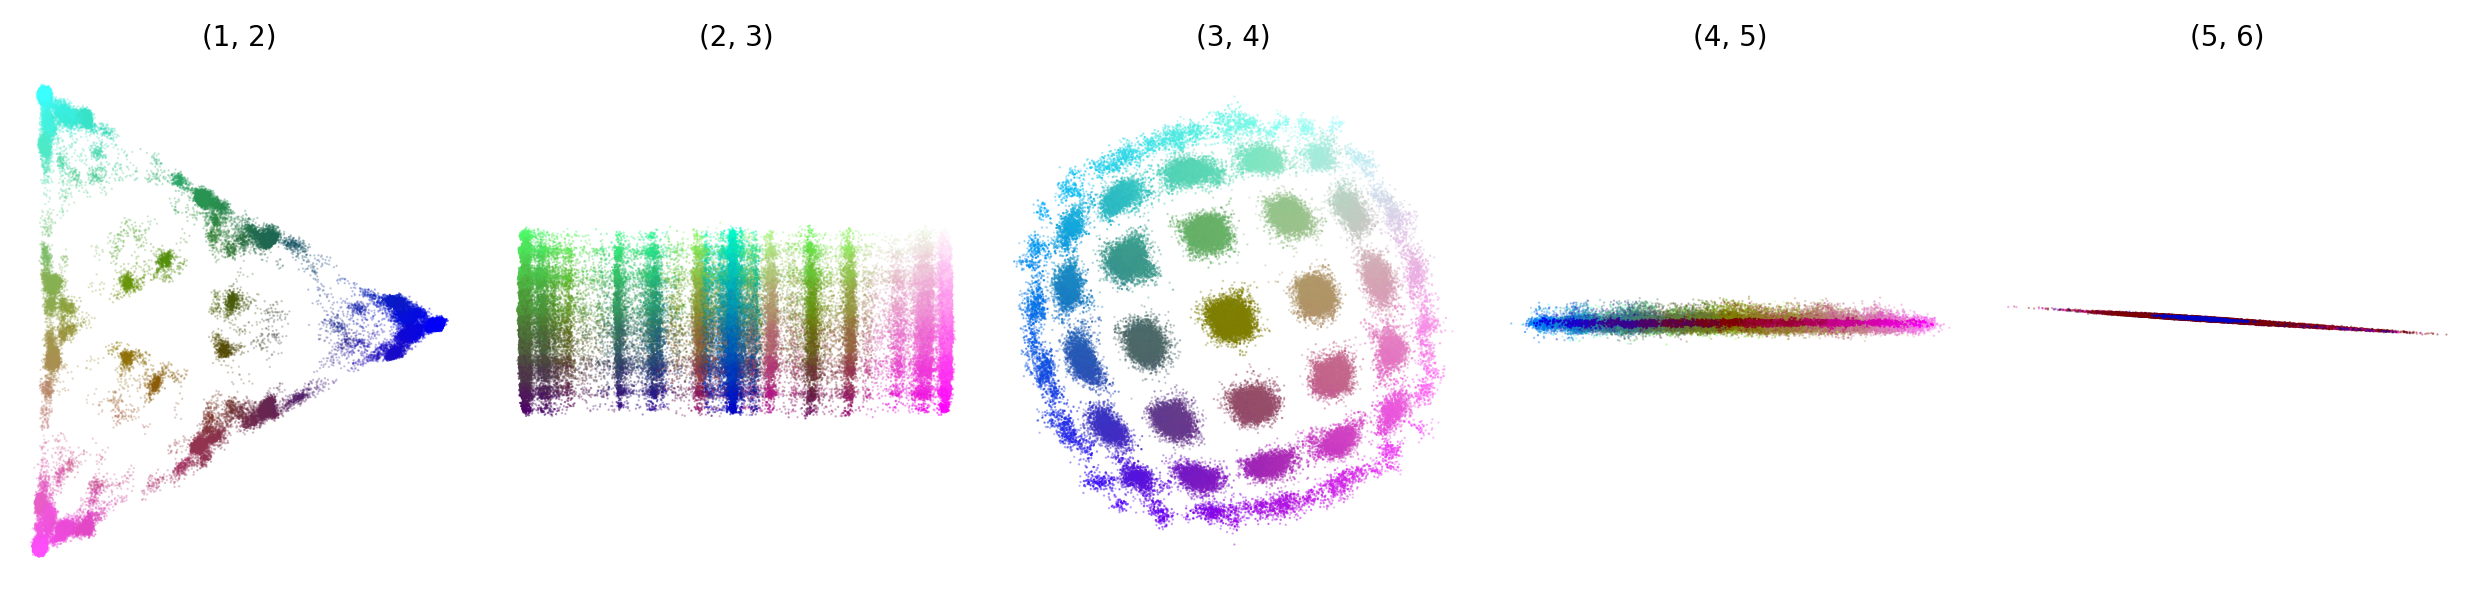

In [12]:
plot_projections(results[1], Y_beliefs, W_probs, 6)